---
# Project Ensemble Techniques - Saravanan Janarthanan

## Part A

DOMAIN: Te l e c o m

CONTEXT: A  telecom  company  wants  to  use  their  historical  customer  data  to  predict  behaviour  to  retain  customers.  You  can  analyse  all relevant customer data and develop focused customer retention programs.

DATA  DESCRIPTION: Each  row  represents  a  customer,  each  column  contains  customer’s  attributes  described  on  the  column  Metadata.  The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.


*** 1. Data Understanding & Exploration: ***

***Q1A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.***

    

In [1]:
# Load the Libraries
import numpy  as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

class color:
   BOLD = '\033[1m'
   END = '\033[0m'


***Ans 1A Use read_csv() function to load the TelcomCustomer-Churn_1 data into a Data frame***

In [2]:
# Load the TelcomCustomer-Churn_1 CSV data
teleCustChurn1_data = pd.read_csv( 'Ensemble_Technique_Project\TelcomCustomer-Churn_1.csv' )



***Q 1B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.***

***Ans 1B Use read_csv() function to load the TelcomCustomer-Churn_2 data into a Data frames***

In [3]:
# Load the TelcomCustomer-Churn_2 CSV data
teleCustChurn2_data = pd.read_csv( 'Ensemble_Technique_Project\TelcomCustomer-Churn_2.csv' )


***Q 1C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame***

***A 1C. Check the column or feature details of both dataframe and then Merge both the DataFrames on key ‘customerID’ to form a single DataFrame***

In [4]:
# Check the features of TelcomCustomer-Churn_1
teleCustChurn1_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
# Check the features of TelcomCustomer-Churn_2
teleCustChurn2_data.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
teleCustChurn1_data.size

70430

In [7]:
teleCustChurn2_data.size

84516

In [8]:
teleCustMergedData = teleCustChurn1_data.merge( teleCustChurn2_data, on=['customerID'], how='inner')

In [9]:
teleCustMergedData.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [10]:
teleCustMergedData.shape

(7043, 21)


***Q 1D.Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.***

In [11]:
teleCustChurn1_data['customerID'].isin(teleCustChurn2_data['customerID']).value_counts()

True    7043
Name: customerID, dtype: int64

***Ans 1D.***  The row counts of merged data is same as the common values in customerID feature between TelcomCustomer-Churn_1 and TelcomCustomer-Churn_2 csv files




*** 2. Data Cleaning & Analysis: ***

***Q 2A. . Impute missing/unexpected values in the DataFrame***



In [12]:
teleCustMergedData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
teleCustMergedData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
#Check unique values in each column

for colmn in teleCustMergedData:
    if colmn == 'customerID' :
        print('Skipping Customer ID column')
    elif teleCustMergedData[colmn].dtypes == 'object' :
        print('Unique Values for ' + colmn)
        print(teleCustMergedData[colmn].value_counts())
    else :
        print('Skipping Column : ' + colmn)
    


Skipping Customer ID column
Unique Values for gender
Male      3555
Female    3488
Name: gender, dtype: int64
Skipping Column : SeniorCitizen
Unique Values for Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Unique Values for Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
Skipping Column : tenure
Unique Values for PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
Unique Values for MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Unique Values for InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Unique Values for OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Unique Values for OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
Unique Value

In [15]:
#teleCustMergedData[ 'TotalCharges' ].fillna('Nan', inplace = True)
print( teleCustMergedData['TotalCharges'].count() )
print(teleCustMergedData[ 'TotalCharges' ].value_counts())
teleCustMergedData_dup = pd.DataFrame.from_dict(teleCustMergedData)

# Find the mean value to fill in
meanvalue =  (pd.to_numeric(teleCustMergedData_dup['TotalCharges'], errors='coerce')).mean()
print(meanvalue)

teleCustMergedData.loc[teleCustMergedData['TotalCharges']==' ',  'TotalCharges'] = meanvalue

#Update the Nan columns with mean value
#teleCustMergedData[ 'TotalCharges' ] =   teleCustMergedData[ 'TotalCharges' ].fillna(meanvalue, downcast=dict, inplace=True)



7043
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64
2283.3004408418697



***Q 2B Make sure all the variables with continuous values are of ‘Float’ type***

***Ans 2B.***
Use the astype function to change the datatype of the columns

In [16]:
teleCustMergedData["TotalCharges"].count()

7043

In [17]:

# Convert TotalCharges into float as other object data type columns are Categorical type
teleCustMergedData["TotalCharges"]       = teleCustMergedData["TotalCharges"].astype(float)
teleCustMergedData["TotalCharges"].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [18]:
teleCustMergedData["TotalCharges"].count()

7043

In [19]:
#Check the dattype change
teleCustMergedData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


***Q 2C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart***

***Ans 2C.***

Skipping Customer id as it is unique


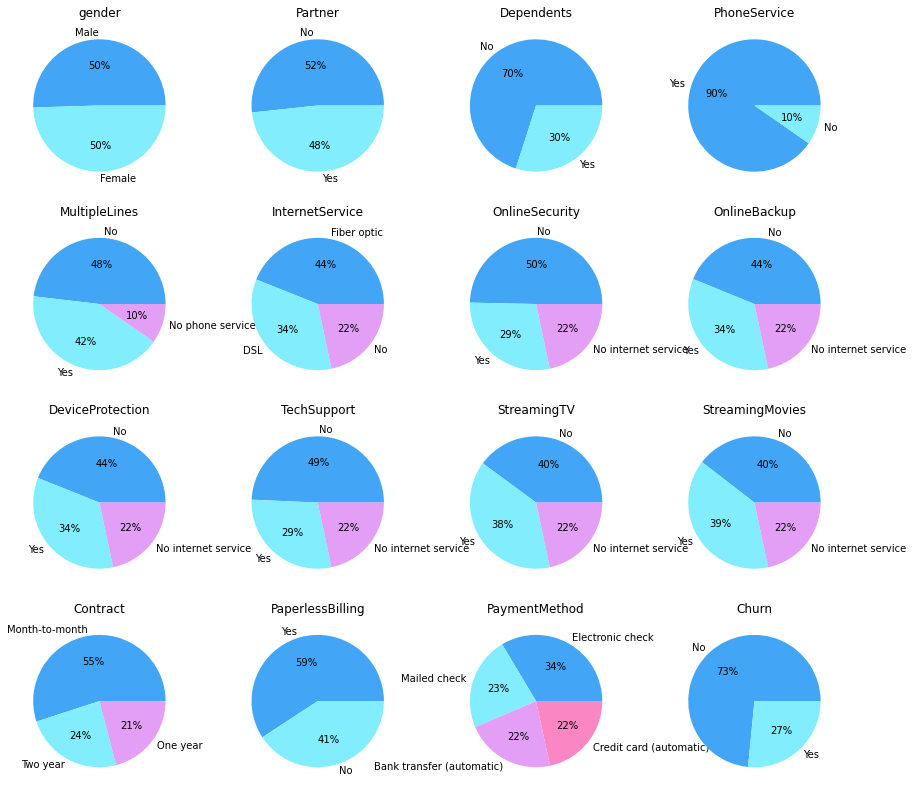

In [20]:
#create a sub function to recieve the dataframe and print the pie chart using the column/feature attrbiutes
def PublishCatgPieChart(inDf) :
    # declare the subplot index number
    subplotnum = 1;
    #set the figure size big enough tomplot 16 pi charts
    plt.figure(figsize=[15,14])
    # set the color schemes using the hex codes for changing default color pallette
    clrPalt = ["#42a5f5", "#82EEFD", "#E39FF6", "#FA86C4"]
    #Iterate the dataframe columns to print the pie chart
    for colmn in inDf:
        #Check if the column type is not continous and is Categorical
        if colmn == 'customerID' :
            print("Skipping Customer id as it is unique")
        elif inDf[colmn].dtypes == 'object' :
            # use the unique value counts to be used as pie values
            pievalues = inDf[ colmn ].value_counts()
            # use the index  values as labels
            pielabels = pd.Series(pievalues.index, dtype=str)
             # Plotting the pie chart for each Categorical column in dataframe
            plt.subplot(4,4,subplotnum) 
            plt.title( colmn )
            subplotnum = subplotnum + 1
            plt.pie( pievalues, labels=pielabels, colors=clrPalt, autopct='%1.0f%%' )
                                

                
# call the sub fucntion to print the pie charts by passing the dataframe.         
PublishCatgPieChart(teleCustMergedData)    


***Q 2D. Share insights for Q2.c.***

***Ans. 2D.***

In [21]:
phser = teleCustMergedData.loc[ teleCustMergedData['PhoneService']== 'No']
print('People Not using Phone Service : ' + str(phser['PhoneService'].count()))
phser = teleCustMergedData.loc[ teleCustMergedData['MultipleLines']== 'No phone service']
print('People using Multiple Lines with no phone service: ' + str(phser['MultipleLines'].count()))
teleCustMergedData.count()


People Not using Phone Service : 682
People using Multiple Lines with no phone service: 682


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

Observations
- Gender           :  Subscriber's Data contains both the gender equally
- Partner          :  More than half of the Subscribers have a partner              
- Dependents       :  Dependents are comparetively less than the partners at 30%      
- PhoneService     :  Only 1/10th of the subscribers do not use the Telephone service    
- MultipleLines    :  Apart from the 10% having no phone service, close to 50% have single line and rest have more than one line 
- InternetService  :  Slightly around above 20% have no internet service, around 2/5th use Fiber optic internet service and rest uses DSL
- OnlineSecurity   :  Half of the users have secured their internet service, close to 1/3rd has no security even though they use the internet service  and for the rest, just above 20%,  security does not apply as they dont use the internet.   
- 22% of them who has no 'Internet service' there is NO option for 'OnlineBackup',   'DeviceProtection',  'TechSupport' , 'StreamingTV', 'StreamingMovies' is applicable.
- Contract         : More subscribers are opting for Month-to-Month contract than long term like 1 year or 2 year contract and might be thinking it might be easier  to switch over to another provider without breaking contract and avoid penalty
- PaperlessBilling : Viewing and storing bills online is higher among the sibscriber   
- PaymentMethod    : 75% of the subscribers use digital payment methods rather than paper checks   
      



***Q 2E. Encode all the appropriate Categorical features with the best suitable approach.***

***Ans 2E. Perform one-hot encoding for categorical variables based on the values***

In [22]:
# As Gender and PhoneService features might infleunce the churn hot encoding is done and for rest of the categorical features the values are replaced using a continous variable value system
hotEncodedFeatures = ['gender', 'PhoneService']
restructFeatVals = {
                   'Partner' : {'No': 1, 'Yes' : 2},
                   'Dependents' : {'No': 1, 'Yes' : 2},
                   'PaperlessBilling' : {'No': 1, 'Yes' : 2},
                   'MultipleLines' : {'No': 1, 'Yes' : 2, 'No phone service' : 3},
                   'InternetService' : {'DSL': 1,  'Fiber optic' : 2, 'No'  : 3},
                   'OnlineSecurity' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'DeviceProtection' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'TechSupport' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'StreamingTV' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'StreamingMovies' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'OnlineBackup' : {'No': 1, 'Yes' : 2, 'No internet service' : 3},
                   'Contract' : {'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3},
                   'PaymentMethod' : {'Credit card (automatic)' : 1, 'Bank transfer (automatic)' : 2, 'Electronic check' : 3, 'Mailed check' : 4},
                   'Churn' : {'No': 0 , 'Yes' : 1}
                         }

#Use the restructured dict to replqce the categorical values
teleCustMergedData = teleCustMergedData.replace( restructFeatVals )

#use one hot coding for two features
teleCustMergedData = pd.get_dummies(teleCustMergedData, columns=hotEncodedFeatures)
#teleCustMergedData.head(25)


***Q 2F. Split the data into 80% train and 20% test.***

***Ans 2F.***

In [23]:
#Split the columns with churn as a single data set and rest of the features as another dataset, CustomerID is dropped as does not add any value
X = teleCustMergedData.drop(['Churn','customerID'] , axis=1)
Y = teleCustMergedData['Churn']


In [24]:
#import the libraries to split the data
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
X_Z_Scaled = X.apply(zscore)
X_train, X_test, Y_train, Y_test = train_test_split(X_Z_Scaled, Y, test_size=0.20, random_state=2)



***Q 2G. Normalize/Standardize the data with the best suitable approach.***

***Ans 2G.***

In [25]:
#Use the MinMaxScaler class to normalize/ standardize as we have negatie values to signify that they dont add value to categorical classification
from sklearn.preprocessing import MinMaxScaler

In [26]:
# declare the MinMaxScaler object
NormzStdScaler = MinMaxScaler()

#Transform the data
X_train_NrmStd = NormzStdScaler.fit_transform(X_train)
X_test_NrmStd = NormzStdScaler.fit_transform(X_test)



*** 3. Model building and Improvement: ***

***Q 3A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.***

***Ans 3A Use the XGBRegressor to train and identidy the best performing parameters based on***

- n_estimators - boosting rounds
- Learning rate eta
- maximum tree depth for base learners

In [27]:
%pip install xgboost
import xgboost as xgb


Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [29]:
#declare the XGBRegresser object
xgbReg = xgb.XGBRegressor()

# train the model
xgbReg.fit(X_train_NrmStd, Y_train)

#predict outputs
xgbPredics = xgbReg.predict(X_test_NrmStd)

# using r square as a measure of accuracy as the accuracy and confusion matrix fail for continous targets and they work best on classification targets
print( 'R score is : ', r2_score( Y_test, xgbPredics ) )

scores = cross_val_score( xgbReg, X_train_NrmStd, Y_train, cv=5)
print(' Mean cross-validation-score is : %.2f' % scores.mean() )

kfold = KFold(n_splits=10, shuffle=True)
KF_scores = cross_val_score( xgbReg, X_train_NrmStd, Y_train, cv=kfold)
print(' K-Fold  Avg score is : %.2f' % KF_scores.mean() )

R score is :  0.2154709136165368
 Mean cross-validation-score is : 0.19
 K-Fold  Avg score is : 0.21




Single iteration resulted in lesser preidtion score,  hence use multiple iterations with combination of boosting rounds(n_estimators), Learning rate (eta) and maximum depth values



In [30]:
#declare the XGBRegresser object
xgbRegnew =  xgb.XGBRegressor()
params={'n_estimators': range(1,50),  'learning_rate' : [0.1,0.2, 0.4, 0.6], 'max_depth':[2,4,5,6,8]}
gridSrch=GridSearchCV(estimator=xgbRegnew, cv=2, param_grid=params, scoring='neg_mean_squared_error')

#Train the model
gridSrch.fit(X_train_NrmStd, Y_train)

print('Best Extimator from grid search : ' , gridSrch.best_estimator_)

Best Extimator from grid search :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=38, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


The optimized parameters like 
- max_depth as 4
- n_estimators as 38
- learning rate as 0.1

are identified from the regression

In [31]:
# use the best performing parameters from the grid search optimized param results
xgbBestPerfm =  xgb.XGBRegressor(
                 base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
                 max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
                  monotone_constraints='()', n_estimators=38, n_jobs=0,
                 num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
                 reg_lambda=1, 
                 scale_pos_weight=1, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None
                 )

# Train the model
xgbBestPerfm.fit( X_train_NrmStd, Y_train )

#predict outputs
xgbPredict2 = xgbBestPerfm.predict(X_test_NrmStd)
print( 'R score optimized XGB: ', r2_score( Y_test, xgbPredict2 ) )

scores = cross_val_score( xgbBestPerfm, X_train_NrmStd, Y_train, cv=5)
print(' Mean cross-validation-score is : %.2f' % scores.mean() )

kfold = KFold(n_splits=10, shuffle=True)
KF_scores = cross_val_score( xgbBestPerfm, X_train_NrmStd, Y_train, cv=kfold)
print(' K-Fold  Avg score is : %.2f' % KF_scores.mean() )

R score optimized XGB:  0.29660995476611973
 Mean cross-validation-score is : 0.30
 K-Fold  Avg score is : 0.30


***Ans 3A***
The prediction R mean square score has improved by 9 points based on the optimized paramters.
The cross-validation and KFold increased by 11 and 9 pts respectively.




***Q 3B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance***

***Ans 3B.***
By reducing the learning rate and increase the boosting rounds lets find out the optimum parameters

In [32]:
#declare the XGBRegresser object
xgbRegnew1 =  xgb.XGBRegressor()

#use range 1 to 75
params1={'n_estimators': range(1,75),  'learning_rate' : [0.05,0.75, 0.1, 0.125, 0.15, 0.175], 'max_depth':[2,4,5,6,8]}
gridSrch1=GridSearchCV(estimator=xgbRegnew1, cv=2, param_grid=params1, scoring='neg_mean_squared_error')

#Train the model
gridSrch1.fit(X_train_NrmStd, Y_train)

print('Best Extimator from grid search : ' , gridSrch1.best_estimator_)

Best Extimator from grid search :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=73, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


The optimized parameters like 
- max_depth as 4
- n_estimators as 73 (boosting rounds)
- learning rate as 0.05

are identified from the regression

In [33]:
# use the best performing parameters from the grid search optimized param results
xgbBestPerfm1 =  xgb.XGBRegressor(
                  base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
                 max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
                 monotone_constraints='()', n_estimators=73, n_jobs=0,
                 num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
                 reg_lambda=1, 
                 scale_pos_weight=1, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None
                 )

# Train the model
xgbBestPerfm1.fit( X_train_NrmStd, Y_train )

#predict outputs
xgbPredict3 = xgbBestPerfm1.predict(X_test_NrmStd)
print( 'R score optimized XGB: ', r2_score( Y_test, xgbPredict3 ) )

scores = cross_val_score( xgbBestPerfm1, X_train_NrmStd, Y_train, cv=5)
print(' Mean cross-validation-score is : %.2f' % scores.mean() )

kfold = KFold(n_splits=10, shuffle=True)
KF_scores = cross_val_score( xgbBestPerfm1, X_train_NrmStd, Y_train, cv=kfold)
print(' K-Fold  Avg score is : %.2f' % KF_scores.mean() )

R score optimized XGB:  0.29496654739657
 Mean cross-validation-score is : 0.30
 K-Fold  Avg score is : 0.31


The R score has improved by little.
The cross-validation-score and KFold improved by 1 pt



---

**Part B**


 CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts 
involved in building workflows for each dataset.
- PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

- STEPS AND TASK
1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 
1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.
Include best coding practices in the code:
• Modularization
• Maintainability
• Well commented code etc.

In [35]:
#import the libraries 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import tkinter as tk
from tkinter.filedialog import askopenfilename
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
import pickle

 

***Modualar design steps***
1. Load the csv file (hard coded instead of user choosing a file)
2. check the columns of type object a print unique values
3. Segregate categorical columns having less than 10 unique values for one hot coding
4. Confirm the target column for predicition
5. Validate the feature/column types and take appropiate action (convert to float or one hote encoding
6. check the continous variable values in the column
7. if the continous variable column has null or non acceptable values replace with mean value.
8. perform one hot encoding

*** Define the Functions ***



In [37]:

# defining open_file_chooser function
# Function used to open a window dialog for choosing the file  
def open_file_chooser():
    filename = askopenfilename()
    print("You have selected : %s" % filename) 
    
# A Fucntion to create a popup window with a button to invoke the file chooser window dialog (not used)
def renderFileOpenWindow():    
    # creating an instance of Tk
    root = tk.Tk()
    root.title("Example")
    # Button : Open
    open = tk.Button(root, text = "Open", command = open_file_chooser)
    open.pack()
    # Open the Button popup
    root.mainloop()   




# print or list the features available in Dataframe
def printFeaturesList( df ):
    i = 0
    futrList = []
    print('Option   Feature_name')
    for colmn in df:
        print(i+1,  '     : ' ,  colmn)        
        futrList.append(colmn)
        i= i + 1
    return  futrList 


        
# A function to return the list of features that needs oneHot encoding        
def identifyColumnsforOneHotEncoding( df, predictedFeature ): 
    returnList = []
    for colmn in df:
        if df[colmn].dtypes == 'object' and colmn != predictedFeature :
            colmnDet = df[colmn].value_counts()
            if(colmDet.size < 10):
                 print('Adding Column for one hot encoding ', colmn)
                 returnList.append(colmn)
    return  returnList               


# A Function to drop rows of Categorical features that has no value and difficult to assign values
def cleanupNullAndSplCharOnSupportingCategoryFeature(df, predictedFeature) :
    Splchar = '[!@#$%&*_+=|\:";<>,./()[\]{}\']'  
    aboveTenUniqValcol = []
    lessTenUniqValcol = []
    for (columnName, columnData) in df.iteritems():
        preProsCol = False
        
        if df[columnName].dtypes == 'object' and columnName != predictedFeature :
                colmnDet = df[columnName].value_counts()
                
                if( colmnDet.size > 10):
                    aboveTenUniqValcol.append( columnName )
                else :
                    lessTenUniqValcol.append( columnName )
                    preProsCol = True
                    print(' cleaning up Feature  : ', columnName)
                    print(' The unique values present is less than 10')
                    
                    for (idx, columnval) in columnData.iteritems() :
                        delrow = False
                        trimmedVal = columnval.strip()
                        
                        if( trimmedVal == ""):
                            delrow = True
                            print('empty val row index ', idx)
                        
                        elif len(trimmedVal) == 1 :
                            if any( trimmedVal in Splchar ):
                                delrow = True
                                print('Spl Char row index ', idx)
                                
                        if(delrow):
                            print('Dropping row : ', idx)
                            df.drop(idx)
    # return the features that has lesser and larger unique data groups
    return aboveTenUniqValcol, lessTenUniqValcol


# A function to enable user to drop the non value adding features that has too many categorical values to perform hot encoding
def dropHugeUniqueValuecolumns(df, hugeUniqValColLst):
    quitLoop = False
    while( quitLoop == False):
        print('Choose the column to drop that does not aid in prediction that has more than 10 unique values and drop, Q to quit')
        for idx in range ( len( hugeUniqValColLst) ) :
            print( idx+1 , ' : ' , hugeUniqValColLst[idx] )
        selFutrStr = input()
        try :
            selFutr = int( selFutrStr )
            if(selFutr > 0 and selFutr <= len(hugeUniqValColLst)):
                print('You have selected option # : ', selFutr)
                print( 'Dropping Feature name : ', hugeUniqValColLst[ selFutr-1 ] )             
                df.drop(hugeUniqValColLst[ selFutr-1 ], inplace=True , axis=1)
                hugeUniqValColLst.pop( selFutr-1 )           
            else:
                print('Please enter a valid option listed between 1 and ', len(lessthanTenUniqValFtr))    
        except ValueError :
            if(selFutrStr == 'Q'):
                quitLoop = True
            else:    
                print('Please enter a valid numerical value') 



#A fucntion to print the unique values of features
def printUniquevaluesofCategoricalFeatures( df ):
    for colmn in df:
        if df[colmn].dtypes == 'object' :
            print('Unique Values for ' + colmn)
            #print(df[colmn].value_counts())
        

# A Function to preprocess the categorical column value features and  convert their values to numerical ones through hot encoding
def preprocesFeaturesForTrainingTheModel(df, predictedFeature):
    # Retrieve the list of features that can be hot encoded or thats needs cleanup
    aboveTenUniqValFtr, lessthanTenUniqValFtr = cleanupNullAndSplCharOnSupportingCategoryFeature(df, predictedFeature)
    # Function for the user to drop columns that does not influence the prediction and difficult to encode or convert to float
    dropHugeUniqueValuecolumns(df, aboveTenUniqValFtr)
    ftrsForEncoding = []
    print('test msg, delete later ' , aboveTenUniqValFtr)
    combFtrLst = aboveTenUniqValFtr + lessthanTenUniqValFtr
    #Iterate features to encode or convert to float
    for idx in combFtrLst:
        convrtdFltFlg = convertFeatureToFloatDatatype(df, idx , df[idx] )
        if(convrtdFltFlg == False):
            print(idx, 'Feature identified for one hot encoding')
            ftrsForEncoding.append(idx)
    # Call the fucntion to encode the list the features identified.
    print('features for encoding : ', ftrsForEncoding)
    df = performOneHotEncodingOnFeatures(df, ftrsForEncoding)
    #df.to_csv("Ensemble_Technique_Project\PreprocessedDF.csv")
    return df
    
    

# A Function that converts the given feature that replaces any missing values for features that has more numerical 
# values and replace the unexpetced values with a mean value of numerical row calues  
def convertFeatureToFloatDatatype(df, colmNm, colmData):
    print( 'Feature : ' , colmNm )
    print( 'convertToFloatDatatype :: Trying to convert feature ' + colmNm + ' to a float datatype ' )
    conToFlt = False
    # try to convert the feature to a float datatype
    try:
        df[colmNm] = df[colmNm].astype(float)
        conToFlt = True
    # capture the error condition when conversion to float fails
    except ValueError :
        print( 'convertToFloatDatatype:: Could not convert the feature' + colmNm + ' datatype to float' )
        rowCount = df[colmNm].size
        colmUniqVal = df[colmNm].value_counts()
        numCount = 0
        strCount = 0
        splChCount = 0
        # Iterate through the rows to identify the pre-dominant datatype in the feature
        for idx in colmUniqVal.index:
            try :
                val = float(idx)
                numCount = numCount + colmUniqVal[idx]
            except ValueError :                
                if idx.isalpha() :
                    strCount = strCount + colmUniqVal[idx]
                else :
                    splChCount = splChCount + colmUniqVal[idx]
         
        if( strCount > rowCount/2 or splChCount > rowCount/2) :
            print( 'convertToFloatDatatype :: ', colmNm,  ' feature has above average characters or spl characters values ,  need to use one hot encoding  ' )
        else :
            print( 'convertToFloatDatatype :: Converting the row values to float' )
            for idx in colmData.index :
                try :
                    val = float(colmData[idx])
                except ValueError :     
                    df[colmNm].iloc[idx] = ''
            print( 'convertToFloatDatatype :: All the non-numeric values are nullified' )
            print('convertToFloatDatatype :: replacing the nulls with the mean value of the deature')
            df_temp = df[colmNm].copy(deep=False)
            meanvalue =  (pd.to_numeric(df_temp, errors='coerce')).mean()
            df.loc[df[colmNm]=='',  colmNm] = meanvalue
            df["TotalCharges"]       = df["TotalCharges"].astype(float)
            conToFlt = True
    #return whteher the conversion was success or failure        
    print('Converted to Float : ' , conToFlt)
    return conToFlt            
            
    

# Fucntion to perform one hot encoding for identified features    
def performOneHotEncodingOnFeatures( df, colmnLst):
    #use one hot coding for two features
    return pd.get_dummies(df, columns=colmnLst)       
    
# Fucntion to list the features, for the user to select a feature as target feature to be predicited
def selectTargetFeatureForPrediction(ftrLst):
    print('\n Enter a index number of the feature to target for prediciton and hit Enter key')

    # Identify the feature or column to be predicted
    validInput = False
    selFutr = 1
    selfutrNm = ''

    #loop the inout request until a valid option is selected
    while (validInput == False):
        selFutrStr = input()
        try :
            selFutr = int( selFutrStr )
            if(selFutr > 0 and selFutr <= len(ftrLst)):
                print('You have selected option # : ', selFutr)
                selfutrNm = ftrLst[ selFutr-1 ]
                print( 'Feature name : ',  selfutrNm)
                validInput = True
            else:
                print('Please enter a valid option listed between 1 and ', len(ftrLst)) 
        except ValueError :
            print('Please enter a valid numerical value')
    #return the selected feature name
    return selfutrNm
            

# A function that groups the features to train and predict as X and Y.  Also does scaling to convert the 
# feature values as unit agnostic    
def splitDataScaleandTrasnform( df, predictedFeature, testPercent, randomstate ):
    X = df.drop([predictedFeature] , axis=1)
    Y = df[predictedFeature]
    X_Z_Scaled = X.apply(zscore)
    X_train, X_test, Y_train, Y_test = train_test_split( X_Z_Scaled, Y, test_size = testPercent, random_state = randomstate )
    return  X_train, X_test, Y_train, Y_test

# A function to evaluate KNN, Logistic regression models by training the model and then identify the best performing model
def evaluateDifferentModels(X_train, X_test, Y_train, Y_test):
    #Calling K-Nearest Neighbour alogorithm
    # using neignbour count 1,3,5,7 & 9
    KNN_AccuracyScore    = {}
    Logstc_AccuracyScore = {}
    XSGBoostAccScore     = {}
    # Define the neighbour count list
    neignbourCount = [1,3,5,7,9]
    print('*** Executing KNN alogoritm ****')
    # Iterate the neighbour count and execute the KNN
    for idx in neignbourCount :
        KNN_AccuracyScore[idx] = (executeKNNClassifiers(X_train, X_test, Y_train, Y_test, idx))    
    maxIterCount = [1000,1500, 2000,2500, 3000]
    # Iterate the max Iteration and execute the Logistic Regression
    for idx in maxIterCount :
        Logstc_AccuracyScore[idx] = (executeLogisticRegression(X_train, X_test, Y_train, Y_test, idx))    
    # Identify the best model and retrun the same    
    if max( KNN_AccuracyScore) > max( Logstc_AccuracyScore ):
        return KNN_AccuracyScore
    else :
        return Logstc_AccuracyScore
    
    
# Function to train and excute the KNN alogorithm    
def executeKNNClassifiers(X_train, X_test, Y_train, Y_test, neighboutCount ):  
    print("executeKNNClassifiers :: neighbour count : ", neighboutCount)
    KNN_Classifiers = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
    KNN_Classifiers.fit( X_train, Y_train )
    score = KNN_Classifiers.score( X_test, Y_test )
    print("executeKNNClassifiers :: score: ", score)
    return np.round(score,2)


# Function to train and excute the Logistic alogorithm  
def executeLogisticRegression( X_train, X_test, Y_train, Y_test, maxIterationCount ):
    print("executeLogisticRegression :: Max Iterations : ", maxIterationCount)
    log_reg = LogisticRegression(max_iter=maxIterationCount)
    log_reg.fit(X_train, Y_train.values.ravel())
    pred_test = log_reg.predict(X_test)
    pred_train = log_reg.predict(X_train)
    test_accuracy=accuracy_score(Y_test, pred_test)
    print("executeKNNClassifiers :: score: ", test_accuracy)
    return np.round(test_accuracy,2)



In [38]:
#Main function.  For Simplicity the pre defined path file is loaded 
prjDataFrm = pd.read_csv( 'Ensemble_Technique_Project\TelcomCustomer-Churn_2.csv' )

In [39]:
#user selection of feature that needs to be predicted
futrList = printFeaturesList( prjDataFrm )
selFtrColmn = selectTargetFeatureForPrediction( futrList )

Option   Feature_name
1      :  customerID
2      :  OnlineBackup
3      :  DeviceProtection
4      :  TechSupport
5      :  StreamingTV
6      :  StreamingMovies
7      :  Contract
8      :  PaperlessBilling
9      :  PaymentMethod
10      :  MonthlyCharges
11      :  TotalCharges
12      :  Churn

 Enter a index number of the feature to target for prediciton and hit Enter key
12
You have selected option # :  12
Feature name :  Churn


In [40]:
# perform preprocessing of features like converting to float data type or do hot encoding
prjDataFrm = preprocesFeaturesForTrainingTheModel( prjDataFrm, selFtrColmn )

 cleaning up Feature  :  OnlineBackup
 The unique values present is less than 10
 cleaning up Feature  :  DeviceProtection
 The unique values present is less than 10
 cleaning up Feature  :  TechSupport
 The unique values present is less than 10
 cleaning up Feature  :  StreamingTV
 The unique values present is less than 10
 cleaning up Feature  :  StreamingMovies
 The unique values present is less than 10
 cleaning up Feature  :  Contract
 The unique values present is less than 10
 cleaning up Feature  :  PaperlessBilling
 The unique values present is less than 10
 cleaning up Feature  :  PaymentMethod
 The unique values present is less than 10
Choose the column to drop that does not aid in prediction that has more than 10 unique values and drop, Q to quit
1  :  customerID
2  :  TotalCharges
1
You have selected option # :  1
Dropping Feature name :  customerID
Choose the column to drop that does not aid in prediction that has more than 10 unique values and drop, Q to quit
1  :  TotalC

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
# Split the data as test and train for model execution
testDataRatio = 0.3
randomseed    = 2
X_train, X_test, Y_train, Y_test = splitDataScaleandTrasnform( prjDataFrm, selFtrColmn, testDataRatio, randomseed )



In [42]:
# Execute the models and evaluate the best one
bestPerfMdl = evaluateDifferentModels(X_train, X_test, Y_train, Y_test)

*** Executing KNN alogoritm ****
executeKNNClassifiers :: neighbour count :  1
executeKNNClassifiers :: score:  0.7330809275911027
executeKNNClassifiers :: neighbour count :  3
executeKNNClassifiers :: score:  0.7330809275911027
executeKNNClassifiers :: neighbour count :  5
executeKNNClassifiers :: score:  0.7330809275911027
executeKNNClassifiers :: neighbour count :  7
executeKNNClassifiers :: score:  0.7330809275911027
executeKNNClassifiers :: neighbour count :  9
executeKNNClassifiers :: score:  0.7330809275911027
executeLogisticRegression :: Max Iterations :  1000
executeKNNClassifiers :: score:  0.7770941788925698
executeLogisticRegression :: Max Iterations :  1500
executeKNNClassifiers :: score:  0.7770941788925698
executeLogisticRegression :: Max Iterations :  2000
executeKNNClassifiers :: score:  0.7770941788925698
executeLogisticRegression :: Max Iterations :  2500
executeKNNClassifiers :: score:  0.7770941788925698
executeLogisticRegression :: Max Iterations :  3000
executeKN

In [44]:
# Save the model details in a pickle file
fileNm = 'EnsembleProjectModelOutput'
OutputFile = open( fileNm, 'wb')
pickle.dump( bestPerfMdl, OutputFile )
OutputFile.close()